In [78]:
import csv

def create_unique_csv(input_file, output_file):
  """
  Reads a CSV file, extracts unique area values (sorted), and creates a new CSV file
  containing those areas with all corresponding E-P and pH values (as floats) without square brackets.

  Args:
    input_file (str): Path to the input CSV file.
    output_file (str): Path to the output CSV file.
  """

  data = {}
  with open(input_file, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      area = row['area']
      if area not in data:
        data[area] = {'E-P': [], 'pH': []}
      # Convert E-P and pH values to floats before appending
      data[area]['E-P'].append(float(row['E-P']))
      data[area]['pH'].append(float(row['pH']))

  # Sort areas in ascending order before writing
  sorted_areas = sorted(data.keys())

  with open(output_file, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['area', 'E-P', 'pH'])
    writer.writeheader()
    for area in sorted_areas:
      values = data[area]
      values['area'] = area
      # Use list comprehension to remove brackets and join values
      values['E-P'] = ', '.join([str(val) for val in values['E-P']])
      values['pH'] = ', '.join([str(val) for val in values['pH']])
      writer.writerow(values)

# Replace 'combined.csv' with your desired output file name
create_unique_csv('combined.csv', 'unique_combined.csv')  # Replace with your input file name
print("Unique areas data saved to 'unique_combined.csv'")


Unique areas data saved to 'unique_combined.csv'


In [50]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv("fb2.csv")

# Group DataFrame by 'area' and get unique 'E-P' values for each group
def g(df):
  return df.groupby('area')['E-P'].unique().reset_index()

result = g(df.copy())

# Print the DataFrame
print(result)
result.to_csv("unique_1.csv", index=False)


    area                                                E-P
0      0  [0.12, 0.05, 0.09, 0.07, -0.06, 0.11, 0.14, 0....
1      1                                              [0.1]
2      2                                             [0.09]
3      3                                             [0.07]
4      6                                             [0.12]
5      7                                              [0.1]
6      8                                 [0.09, 0.17, 0.18]
7     14                                       [0.16, 0.22]
8     17                                             [0.09]
9     18                                             [0.13]
10    24                                             [0.44]
11    34                                       [0.26, 0.15]
12    36                                       [0.16, 0.32]
13    41                                             [0.17]
14    44                                       [0.16, 0.24]
15    49                                

Slope of the line of best fit: 144.2340
Equation of the line of best fit: y = 144.2340x + -0.3180
R-squared value: 0.4550
p-value: 0.0011


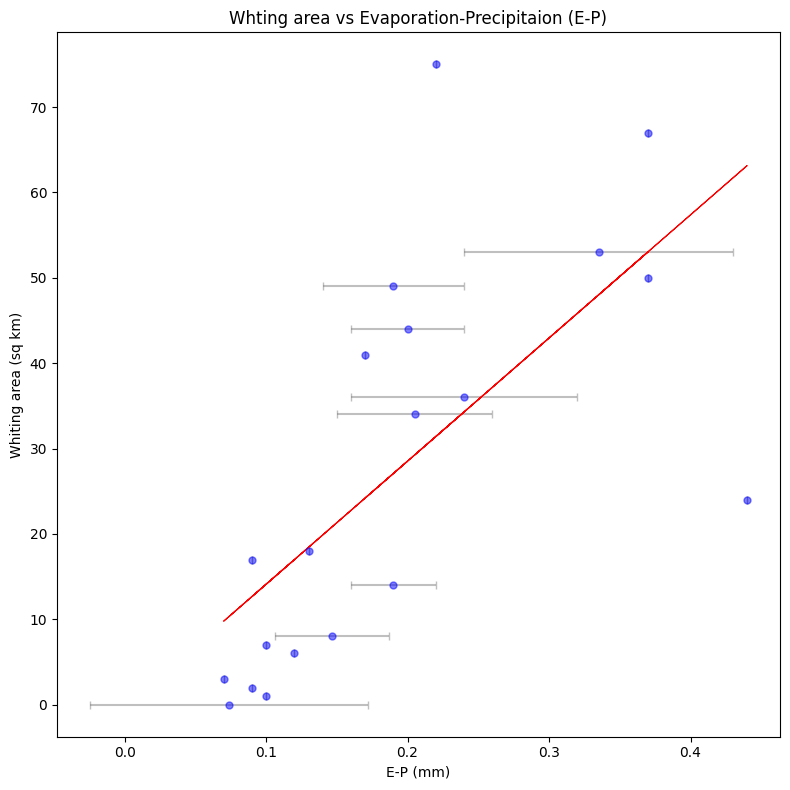

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the CSV file
df = pd.read_csv('unique_E-P.csv')

# Calculate the mean and standard deviation of the E-P column for each row
df['E-P_mean'] = df['E-P'].apply(lambda x: np.mean([float(y) for y in str(x).split(', ')]))
df['E-P_std'] = df['E-P'].apply(lambda x: np.std([float(y) for y in str(x).split(', ')]))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['E-P_mean'], df['area'])

# Print the results
print(f"Slope of the line of best fit: {slope:.4f}")
print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-squared value: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")

# Plot the E-P vs area
plt.figure(figsize=(8, 8))
plt.errorbar(df['E-P_mean'], df['area'], xerr=df['E-P_std'], fmt='o', ecolor='gray', capsize=3, alpha=0.5, markersize=5, color='blue')
plt.xlabel('E-P (mm)') #note: it is mean E-P
plt.ylabel('Whiting area (sq km)')
plt.title('Whting area vs Evaporation-Precipitaion (E-P)')
plt.grid(False)
plt.tight_layout()
# Add the line of best fit
best_fit_line = slope * df['E-P_mean'] + intercept
plt.plot(df['E-P_mean'], best_fit_line, color='red', linewidth=0.8)
plt.savefig('/home/sushil/A_v_E.png', dpi=300)  # Adjust the DPI value as desired

plt.show()

Slope of the line of best fit: 143.6282
Equation of the line of best fit: y = 144x + 0
R-squared value: 0.4717
p-value: 0.0008


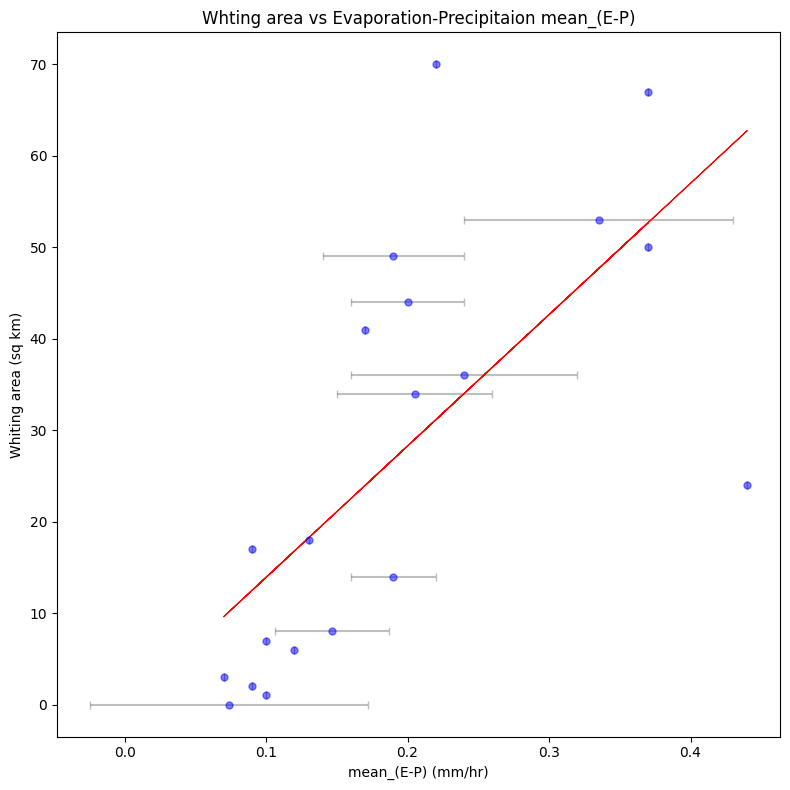

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the CSV file
df = pd.read_csv('unique_E-P.csv')

# Calculate the mean and standard deviation of the E-P column for each row
df['E-P_mean'] = df['E-P'].apply(lambda x: np.mean([float(y) for y in str(x).split(', ')]))
df['E-P_std'] = df['E-P'].apply(lambda x: np.std([float(y) for y in str(x).split(', ')]))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['E-P_mean'], df['area'])

# Print the results
print(f"Slope of the line of best fit: {slope:.4f}")
print(f"Equation of the line of best fit: y = {int(round(slope)) if abs(round(slope) - slope) < 0.5 else round(slope)}x + {int(intercept)}")
print(f"R-squared value: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")

# Plot the E-P vs area
plt.figure(figsize=(8, 8))
plt.errorbar(df['E-P_mean'], df['area'], xerr=df['E-P_std'], fmt='o', ecolor='gray', capsize=3, alpha=0.5, markersize=5, color='blue')
plt.xlabel('mean_(E-P) (mm/hr)') #note: it is mean E-P
plt.ylabel('Whiting area (sq km)')
plt.title('Whting area vs Evaporation-Precipitaion mean_(E-P)')
plt.grid(False)
plt.tight_layout()
# Add the line of best fit
best_fit_line = slope * df['E-P_mean'] + intercept
plt.plot(df['E-P_mean'], best_fit_line, color='red', linewidth=0.8)
plt.savefig('/home/sushil/A_v_E.png', dpi=300)  # Adjust the DPI value as desired

plt.show()

In [3]:
import numpy as np

# Given information
x = 1
y = 144 * x
r_squared = 0.5

# Calculate the change in y when x changes by 0.1
delta_x = 0.2
delta_y = 144 * delta_x

# Calculate the uncertainty in the change of y
uncertainty = np.sqrt(1 - r_squared) * delta_y

print(f"When x changes by 0.1, the change in y is: {delta_y:.2f}")
print(f"The uncertainty in the change of y is: {uncertainty:.2f}")

When x changes by 0.1, the change in y is: 28.80
The uncertainty in the change of y is: 20.36


In [51]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv("fb6.csv")

# Group DataFrame by 'area' and get unique 'pH' values for each group
def g(df):
  return df.groupby('area')['pH'].unique().reset_index()

result = g(df.copy())

# Print the DataFrame
print(result)
result.to_csv("unique_2.csv", index=False)


    area                                                 pH
0      0  [8.03426075, 8.024396896, 8.039434433, 8.05316...
1      1                                      [8.015015602]
2      2                                      [8.062044144]
3      3                                         [8.053792]
4      6                                      [8.037081718]
5      7                                      [8.069068909]
6      8                         [8.023956299, 8.071476936]
7     17                                      [8.083500862]
8     18                                      [8.087106705]
9     24                                       [8.11003685]
10    34                                      [8.033343315]
11    36                         [8.062904358, 8.061160088]
12    44                          [8.08178997, 8.069430351]
13    49                         [8.029465675, 8.104107857]
14    50                                      [8.069926262]
15    53                         [8.0954

Slope of the line of best fit: 444.9999
Equation of the line of best fit: y = 444.9999x + -3563.7863
R-squared value: 0.2821
p-value: 0.0283


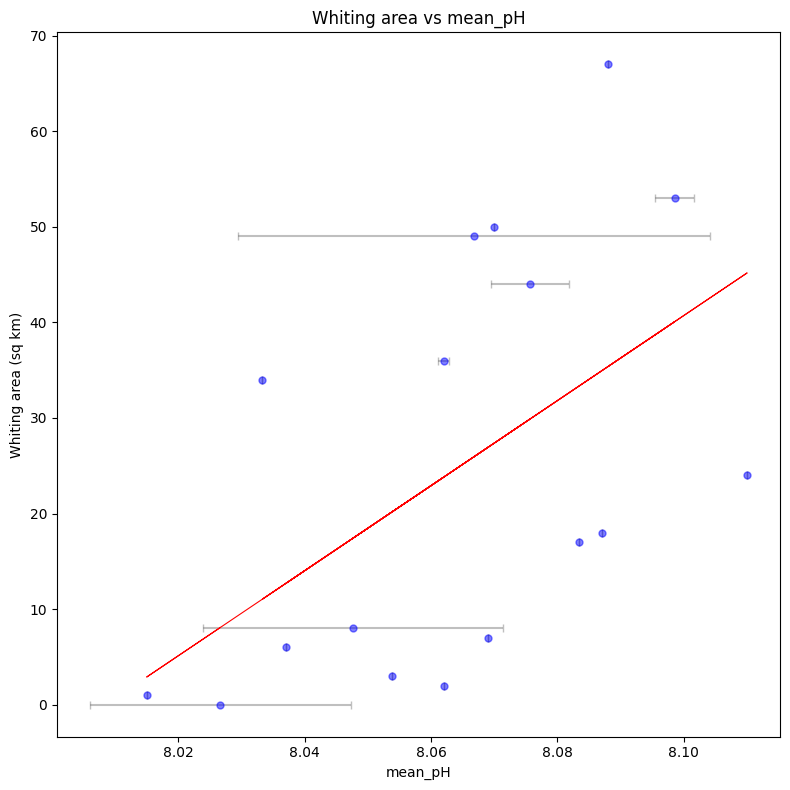

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the CSV file
df = pd.read_csv('unique_pH.csv')

# Calculate the mean and standard deviation of the pH column for each row
df['pH_mean'] = df['pH'].apply(lambda x: np.mean([float(y) for y in str(x).split(', ')]))
df['pH_std'] = df['pH'].apply(lambda x: np.std([float(y) for y in str(x).split(', ')]))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['pH_mean'], df['area'])

# Print the results
print(f"Slope of the line of best fit: {slope:.4f}")
print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-squared value: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")

# Plot the pH vs area
plt.figure(figsize=(8, 8))
plt.errorbar(df['pH_mean'], df['area'], xerr=df['pH_std'], fmt='o', ecolor='gray', capsize=3, alpha=0.5, markersize=5, color='blue')
plt.xlabel('mean_pH') #note: it is mean pH
plt.ylabel('Whiting area (sq km)')
plt.title('Whiting area vs mean_pH')
plt.grid(False)
plt.tight_layout()
# Add the line of best fit
best_fit_line = slope * df['pH_mean'] + intercept
plt.plot(df['pH_mean'], best_fit_line, color='red', linewidth=0.8)
plt.savefig('/home/sushil/A_v_pH.png', dpi=300)  # Adjust the DPI value as desired
plt.show()

In [2]:
import numpy as np

# Given information
x = 1
y = 445 * x - 3564
r_squared = 0.3

# Calculate the change in y when x changes by 0.1
delta_x = 0.1
delta_y = 445 * delta_x

# Calculate the uncertainty in the change of y
uncertainty = np.sqrt(1 - r_squared) * delta_y

print(f"When x changes by 0.1, the change in y is: {delta_y:.2f}")
print(f"The uncertainty in the change of y is: {uncertainty:.2f}")

When x changes by 0.1, the change in y is: 44.50
The uncertainty in the change of y is: 37.23


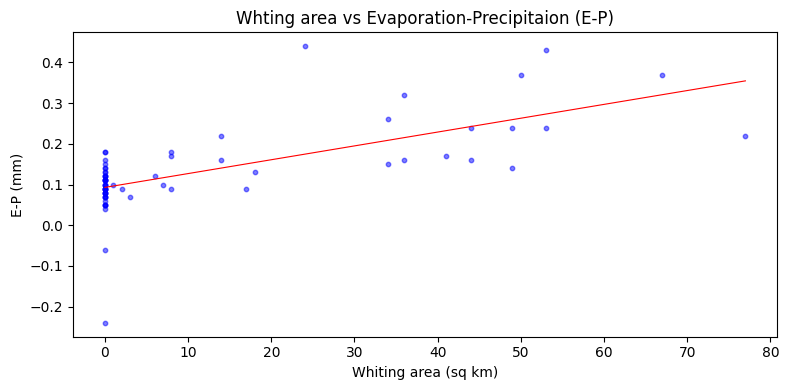

R-squared: 0.45177724247692175
p-value: 1.0158573317162013e-10


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the CSV file
data = pd.read_csv('fb2.csv')

# Extract the two columns
x = data['area']
y = data['E-P']

# Plot the data points
# Set the figure size with a longer width
plt.figure(figsize=(8, 4))  # Adjust the width and height as desired

plt.scatter(x, y, marker='o', color='blue', alpha=0.5, s=10)

# Add a trendline
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline_x = pd.Series([x.min(), x.max()])
trendline_y = intercept + slope * trendline_x
plt.plot(trendline_x, trendline_y, color='red', linestyle='-', linewidth=0.8)

plt.xlabel('Whiting area (sq km)')
plt.ylabel('E-P (mm)')
plt.title('Whting area vs Evaporation-Precipitaion (E-P)')
plt.grid(False)
plt.tight_layout()
# Save the plot as a high-quality image file
plt.savefig('/home/sushil/area_vs_E-P_chart.png', dpi=300)  # Adjust the DPI value as desired
plt.show()

# Calculate the linear regression statistics
r_squared = r_value ** 2

# Print the results
print("R-squared:", r_squared)
print("p-value:", p_value)

/home/sushil/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sushil/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


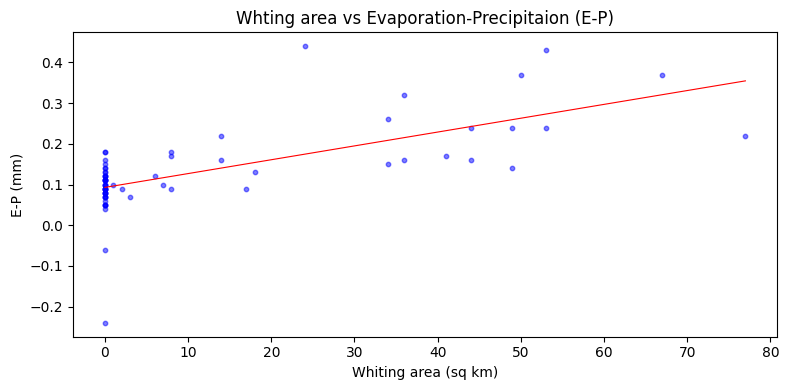

R-squared: 0.45177724247692175
p-value: 1.0158573317162013e-10


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the CSV file
data = pd.read_csv('fb2.csv')

# Extract the two columns
x = data['area']
y = data['E-P']

# Plot the data points
# Set the figure size with a longer width
plt.figure(figsize=(8, 4))  # Adjust the width and height as desired

plt.scatter(x, y, marker='o', color='blue', alpha=0.5, s=10)

# Add a trendline
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline_x = pd.Series([x.min(), x.max()])
trendline_y = intercept + slope * trendline_x
plt.plot(trendline_x, trendline_y, color='red', linestyle='-', linewidth=0.8)

plt.xlabel('Whiting area (sq km)')
plt.ylabel('E-P (mm)')
plt.title('Whting area vs Evaporation-Precipitaion (E-P)')
plt.grid(False)
plt.tight_layout()
# Save the plot as a high-quality image file
plt.savefig('/home/sushil/area_vs_E-P_chart.png', dpi=300)  # Adjust the DPI value as desired
plt.show()

# Calculate the linear regression statistics
r_squared = r_value ** 2

# Print the results
print("R-squared:", r_squared)
print("p-value:", p_value)

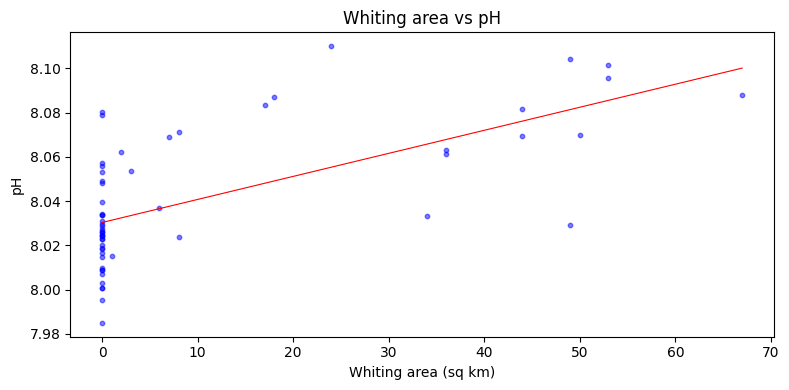

R-squared: 0.41311949089223154
p-value: 5.335656372565067e-08


In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the CSV file
data = pd.read_csv('fb6.csv')

# Extract the two columns
x = data['area']
y = data['pH']
# Set the figure size with a longer width
plt.figure(figsize=(8, 4))  # Adjust the width and height as desired

# Plot the data points
plt.scatter(x, y, marker='o', color='blue', alpha=0.5, s=10)

# Add a trendline
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline_x = pd.Series([x.min(), x.max()])
trendline_y = intercept + slope * trendline_x
plt.plot(trendline_x, trendline_y, color='red', linestyle='-', linewidth=0.8)

plt.xlabel('Whiting area (sq km)')
plt.ylabel('pH')
plt.title('Whiting area vs pH')
plt.grid(False)
plt.tight_layout()
# Save the plot as a high-quality image file
plt.savefig('/home/sushil/area_vs_pH_chart.png', dpi=300)  # Adjust the DPI value as desired
plt.show()

# Calculate the linear regression statistics
r_squared = r_value ** 2

# Print the results
print("R-squared:", r_squared)
print("p-value:", p_value)

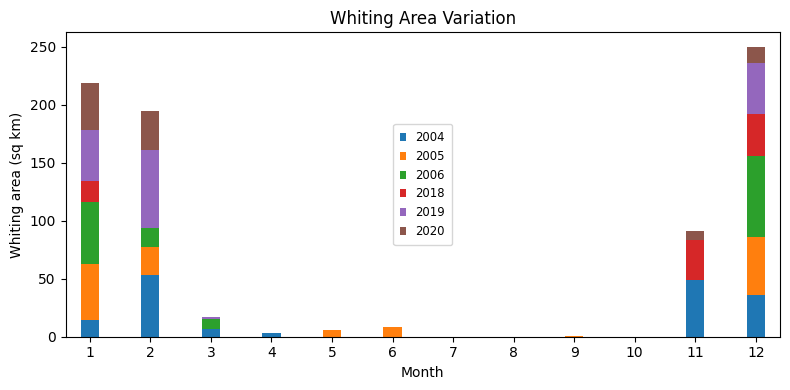

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('fb.csv')

# Extract the desired columns by name
column_names = ['month', '2004_a', '2005_a', '2006_a', '2018_a', '2019_a', '2020_a']  # Replace with your column names
selected_columns = df[column_names]

# Set 'month' as the index
selected_columns.set_index('month', inplace=True)

# Set the figure size with a longer width
plt.figure(figsize=(8, 4))  # Adjust the width and height as desired

# Plot the stacked bar chart
#colors = ['steelblue', 'palegreen', 'indianred', 'gray', 'lightpink', 'goldenrod']  # Replace with your desired colors
ax = selected_columns.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.3)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Whiting area (sq km)')
plt.title('Whiting Area Variation')

# Customize legend names
legend_names = ['2004', '2005', '2006', '2018', '2019', '2020']  # Replace with your desired legend names
plt.legend(legend_names, borderpad=0.6, handlelength=0.5,fontsize ='small', loc='center')

# Adjust x-axis label rotation
plt.xticks(rotation=0)  # Adjust the rotation angle as needed
plt.tight_layout()
# Save the plot as a high-quality image file
plt.savefig('/home/sushil/area_chart.png', dpi=300)  # Adjust the DPI value as desired

# Display the chart
plt.show()


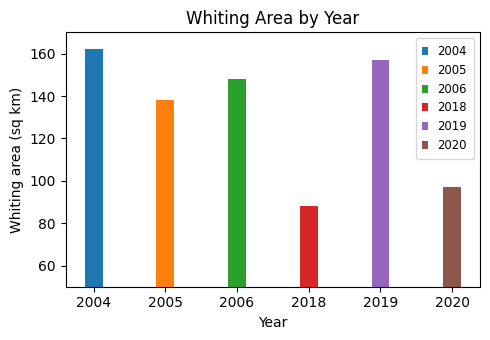

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('fb.csv')

# Filter the years to be displayed on the x-axis
years_to_display = [2004, 2005, 2006, 2018, 2019, 2020]
filtered_data = data[data['year'].isin(years_to_display)]

# Create positions for each bar
positions = range(len(filtered_data))

# Use a standard color map from matplotlib
cmap = plt.get_cmap('tab10')  # 'tab10' is a popular colormap in matplotlib
colors = [cmap(i) for i in range(len(filtered_data))]

# Plot the data
plt.figure(figsize=(5, 3.5))
bars = plt.bar(positions, filtered_data['area'], color=colors, width=0.25)

# Adding title and labels
plt.title('Whiting Area by Year')
plt.xlabel('Year')
plt.ylabel('Whiting area (sq km)')

# Set the y-axis limit to start from 40
plt.ylim(bottom=50)

# Ensure the years are equally spaced on the x-axis
plt.xticks(positions, filtered_data['year'].astype(int))

# Adding legends for each bar
plt.legend(bars, [str(year) for year in filtered_data['year'].astype(int)], borderpad=0.6, handlelength=0.5, fontsize='small', loc='best')
plt.tight_layout()
# Save the figure
plt.savefig('area_by_year.png', dpi=300)  # You can specify the filename and DPI

# Show the plot
plt.show()


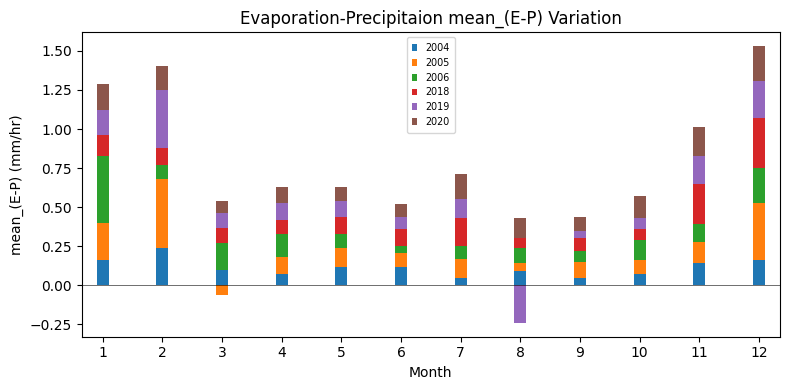

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('fb.csv')

# Extract the desired columns by name
column_names = ['month', '2004_d', '2005_d', '2006_d', '2018_d', '2019_d', '2020_d']  # Replace with your column names
selected_columns = df[column_names]

# Set 'month' as the index
selected_columns.set_index('month', inplace=True)

# Set the figure size with a longer width
plt.figure(figsize=(8, 4))  # Adjust the width and height as desired

# Plot the stacked bar chart
#colors = ['steelblue', 'palegreen', 'indianred', 'gray', 'lightpink', 'goldenrod']  # Replace with your desired colors
ax = selected_columns.plot(kind='bar', stacked=True, ax=plt.gca(),width=0.2)
# Draw a zero line at the origin

# Add labels and title
plt.xlabel('Month')
plt.ylabel('mean_(E-P) (mm/hr)')
plt.title('Evaporation-Precipitaion mean_(E-P) Variation')

# Customize legend names
legend_names = ['2004', '2005', '2006', '2018', '2019', '2020']  # Replace with your desired legend names
plt.legend(legend_names, borderpad=0.6, handlelength=0.5, fontsize = 'x-small', loc='best')

# Adjust x-axis label rotation
plt.xticks(rotation=0)  # Adjust the rotation angle as needed
plt.axhline(0, color='black', linewidth=0.4)

plt.tight_layout()
# Save the plot as a high-quality image file
plt.savefig('/home/sushil/E-P_chart.png', dpi=300)  # Adjust the DPI value as desired


# Display the chart
plt.show()


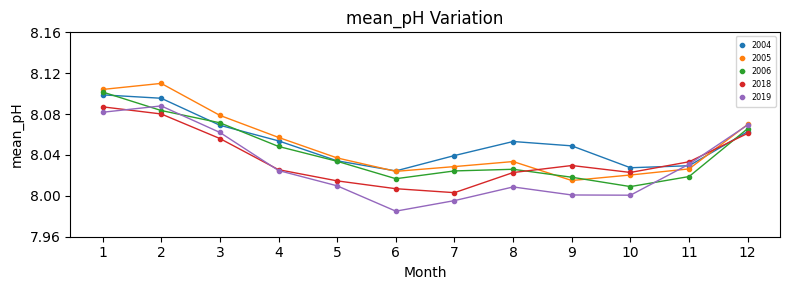

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('fb.csv')

# Extract the desired columns by name
column_names = ['month', '2004_pH', '2005_pH', '2006_pH', '2018_pH', '2019_pH']  # Replace with your column names
selected_columns = df[column_names]

# Set 'month' as the index
selected_columns.set_index('month', inplace=True)

# Set the figure size with a longer width
plt.figure(figsize=(8, 3))  # Adjust the width and height as desired

# Plot the line chart with adjusted line width
ax = selected_columns.plot(kind='line', linewidth=1, ax=plt.gca(), marker='o', markersize=3)  # Adjust the line width as desired
custom_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ax.set_xticks(custom_ticks)  # Add labels and title
plt.xlabel('Month')
plt.ylabel('mean_pH')
plt.title('mean_pH Variation')

# Customize legend names
legend_names = ['2004', '2005', '2006', '2018', '2019']  # Replace with your desired legend names
plt.legend(legend_names, borderpad=0.6, handlelength=0.5, fontsize='xx-small', loc='best')

# Set y-axis limits
plt.ylim(7.96, 8.16)  # Set the y-axis limits
plt.yticks([7.96, 8.00, 8.04, 8.08, 8.12, 8.16])  # Set the y-axis ticks with 8 intervals

plt.tight_layout()
# Save the plot as a high-quality image file
plt.savefig('/home/sushil/pH_chart.png', dpi=300)  # Adjust the DPI value as desired

# Display the chart
plt.show()
